In [1]:
import numpy as np
from surprise import BaselineOnly, KNNWithMeans, SVD, SVDpp, Dataset, accuracy, Reader
from surprise.model_selection import cross_validate, train_test_split

data = Dataset.load_builtin(name=u'ml-100k')

trainset, testset = train_test_split(data, test_size=0.25)

algo = KNNWithMeans()

algo.fit(trainset)

predictions = algo.test(testset)

accuracy.rmse(predictions)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9571


0.9571322374722928

### 알고리즘 비교

#### BaselineOnly

#### KNNWithMeans

#### SVD

#### SVDPP


Estimating biases using als...
RMSE: 0.9470
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9549
RMSE: 0.9452
RMSE: 0.9217


array([0.92170546, 0.94517536, 0.94695773, 0.95493229])

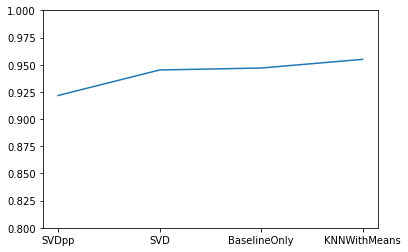

In [2]:
# 비교에 필요한  Surprise 알고리즘
from surprise import BaselineOnly
from surprise import KNNWithMeans
from surprise import SVD
from surprise import SVDpp

# 정확도 측정 관련 모듈
from surprise import accuracy

# Dataset 관련 모둘
from surprise import Dataset

# train / trainset 분리 관련 모듈을 가져온다 
from surprise.model_selection import train_test_split

# 결과를 그래프로 표시하기 위한 라이브러리
import matplotlib.pyplot as plt

# MovieLen 100k 데이터 불러오기 
data = Dataset.load_builtin(name=u'ml-100k')

trainset, testset = train_test_split(data, test_size=0.25)
 
 
algorithms = [BaselineOnly, KNNWithMeans, SVD, SVDpp]
 
names = []
results = []

for option in algorithms:
    algo = option()
    names.append(option.__name__)
    algo.fit(trainset)
    predictions = algo.test(testset)
    results.append(accuracy.rmse(predictions))
    
names = np.array(names)
results = np.array(results)

index = np.argsort(results)
plt.ylim(0.8, 1)
plt.plot(names[index], results[index])
results[index]

In [3]:
sim_options = {
    'name': 'pearson_baseline',
    'user_based': True 
}
algo = KNNWithMeans(k=30, sim_options=sim_options)
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9424


0.9423739779454768

In [4]:
sim_options = {
    'name': 'cosine',
    'user_based': True 
}
algo = KNNWithMeans(k=30, sim_options=sim_options)
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9619


0.9619012273086447

### 다양한 조건 비교

In [5]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split

data = Dataset.load_builtin(name=u'ml-100k')

trainset, testset = train_test_split(data, test_size=0.25)

result = []
for neighbor_size in range(10, 70, 10):
    algo = KNNWithMeans(k=neighbor_size,
                        sim_options={
                            'name': 'pearson_baseline',
                            'user_based': True 
                        })
    algo.fit(trainset)
    predictions = algo.test(testset)
    result.append([neighbor_size, accuracy.rmse(predictions)])
    
result

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9502
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9393
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9376
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9379
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9382
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9383


[[10, 0.950223405584058],
 [20, 0.93929069865871],
 [30, 0.9375786728004334],
 [40, 0.937854593596197],
 [50, 0.9381520922863783],
 [60, 0.9382755386451556]]

In [6]:
# KNN 다양한 파라미터 비교
# Grid Search 를 위한 모듈 가져오기
from surprise.model_selection import GridSearchCV

param_grid = {
    'k': list(range(5, 30, 5)),
    'sim_options': {
        'name': ['pearson_baseline', 'cosine'],
        'user_based': [True, False]
    }
}

gs = GridSearchCV(
        KNNWithMeans, 
        param_grid,
        measures = ['rmse'],
        cv=4
    )

gs.fit(data)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similar

In [7]:
# 최적의 RMSE 출력
print(gs.best_score['rmse'])

# 최적 RMSE 의 parameter 출력
print(gs.best_params['rmse'])

0.9253033747106321
{'k': 25, 'sim_options': {'name': 'pearson_baseline', 'user_based': False}}


In [8]:
# SVD 다양한 파라미터 비교
from surprise import SVD
from surprise.model_selection import GridSearchCV

param_grid = {
    'n_epochs': [70, 80, 90],
    'lr_all': [0.005, 0.006, 0.007],
    'reg_all': [0.05, 0.07, 0.1]
}

gs = GridSearchCV(
    algo_class=SVD,
    param_grid=param_grid,
    measures=['rmse'],
    cv=4
)

gs.fit(data)

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

KeyboardInterrupt: 

### 외부 데이터 사용

In [9]:
import os
import pandas as pd
from surprise import Reader
from surprise import Dataset

base_src = ''
u_data_src = os.path.join(base_src, 'u.data')
r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv(u_data_src, sep='\t',
                      names=r_cols, encoding='latin-1')

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[['user_id', 'movie_id', 'rating']], reader=reader)

In [10]:
print(data.df)

       user_id  movie_id  rating
0          196       242       3
1          186       302       3
2           22       377       1
3          244        51       2
4          166       346       1
...        ...       ...     ...
99995      880       476       3
99996      716       204       5
99997      276      1090       1
99998       13       225       2
99999       12       203       3

[100000 rows x 3 columns]
